In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# OBTENIR LE DATASET

In [4]:
df = pd.read_csv('pointure.data')
df

,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,masculin,182,81.6,30
1,masculin,180,86.2,28
2,masculin,170,77.1,30
3,masculin,180,74.8,25
4,féminin,152,45.4,15
5,féminin,168,68.0,20
6,féminin,165,59.0,18
7,féminin,175,68.0,23


# EXPLORATION DES DONNÉES

In [5]:
df.columns

Index(['Genre', 'Taille(cm)', 'Poids(kg)', 'Pointure(cm)'], dtype='object')

In [6]:
df.shape

(8, 4)

In [7]:
df.head()

,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,masculin,182,81.6,30
1,masculin,180,86.2,28
2,masculin,170,77.1,30
3,masculin,180,74.8,25
4,féminin,152,45.4,15


In [8]:
df.describe()

,Taille(cm),Poids(kg),Pointure(cm)
count,8.000000,8.000000,8.000000
mean,171.500000,70.012500,23.625000
std,10.028531,13.118192,5.629958
min,152.000000,45.400000,15.000000
25%,167.250000,65.750000,19.500000
50%,172.500000,71.400000,24.000000
75%,180.000000,78.225000,28.500000
max,182.000000,86.200000,30.000000


# PRE-TRAITEMENT DES DONNÉES

In [9]:
import numpy as np
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
input_classes = ['masculin','féminin']
label_encoder.fit(input_classes)

# transformer un ensemble de classes
encoded_labels = label_encoder.transform(df['Genre'])
print(encoded_labels)
df['Genre'] = encoded_labels

df

[1 1 1 1 0 0 0 0]


,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,1,182,81.6,30
1,1,180,86.2,28
2,1,170,77.1,30
3,1,180,74.8,25
4,0,152,45.4,15
5,0,168,68.0,20
6,0,165,59.0,18
7,0,175,68.0,23


<Axes: >

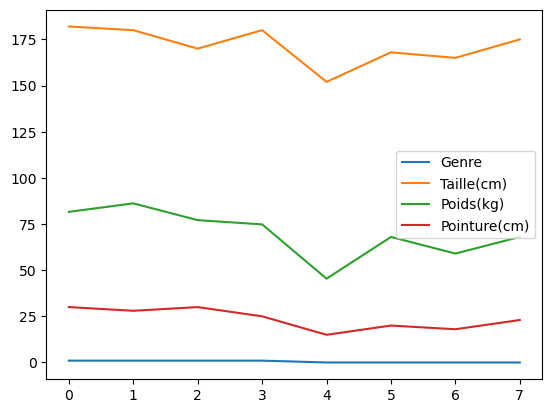

In [10]:
df.plot()

<Axes: >

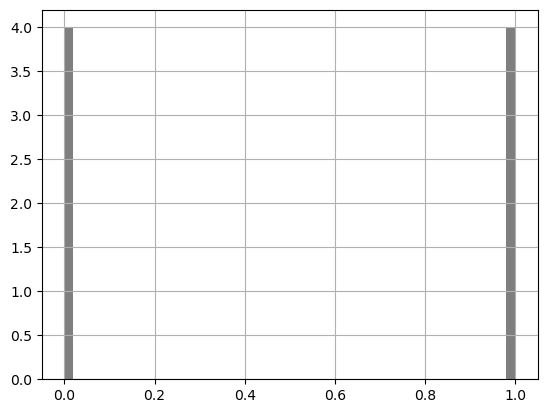

In [11]:
df['Genre'].hist(color='k', alpha=0.5, bins=50)

<Axes: >

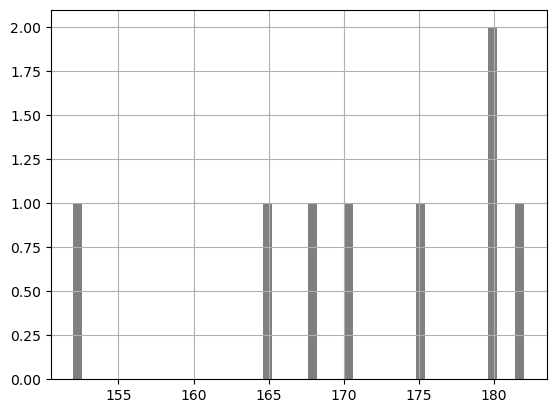

In [12]:
df['Taille(cm)'].hist(color='k', alpha=0.5, bins=50)

<Axes: >

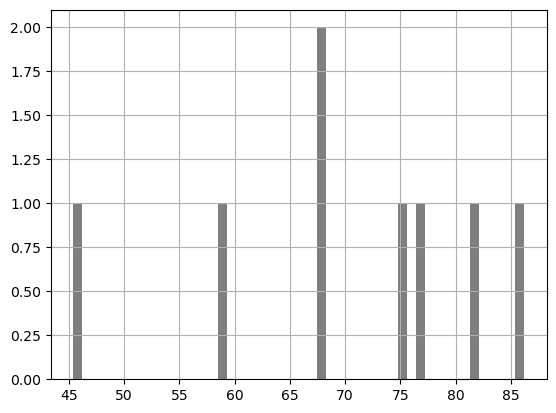

In [13]:
df['Poids(kg)'].hist(color='k', alpha=0.5, bins=50)

<Axes: >

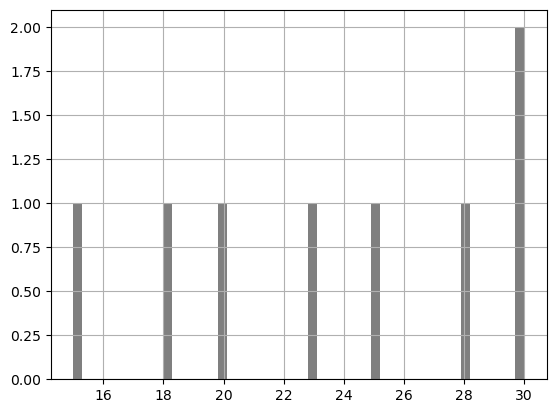

In [14]:
df['Pointure(cm)'].hist(color='k', alpha=0.5, bins=50)

array([[<Axes: title={'center': 'Genre'}>,
        <Axes: title={'center': 'Taille(cm)'}>],
       [<Axes: title={'center': 'Poids(kg)'}>,
        <Axes: title={'center': 'Pointure(cm)'}>]], dtype=object)

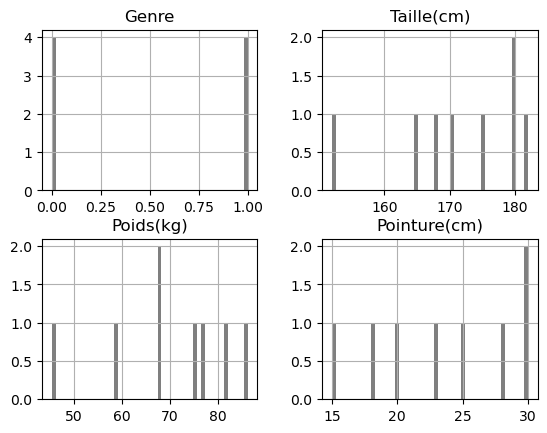

In [15]:
dfplot = pd.DataFrame(df.iloc[:, lambda dfToPredict: [0, 1, 2, 3]], columns=['Genre', 'Taille(cm)', 'Poids(kg)', 'Pointure(cm)'])
dfplot.hist(color='k', alpha=0.5, bins=50)

<Axes: >

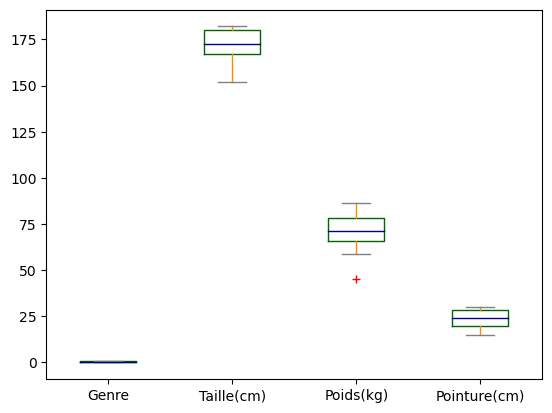

In [16]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
dfplot.plot.box(color=color, sym='r+')

# MATRICE DE CORRELATION ET DE PERSON

array([[<Axes: xlabel='Genre', ylabel='Genre'>,
        <Axes: xlabel='Taille(cm)', ylabel='Genre'>,
        <Axes: xlabel='Poids(kg)', ylabel='Genre'>,
        <Axes: xlabel='Pointure(cm)', ylabel='Genre'>],
       [<Axes: xlabel='Genre', ylabel='Taille(cm)'>,
        <Axes: xlabel='Taille(cm)', ylabel='Taille(cm)'>,
        <Axes: xlabel='Poids(kg)', ylabel='Taille(cm)'>,
        <Axes: xlabel='Pointure(cm)', ylabel='Taille(cm)'>],
       [<Axes: xlabel='Genre', ylabel='Poids(kg)'>,
        <Axes: xlabel='Taille(cm)', ylabel='Poids(kg)'>,
        <Axes: xlabel='Poids(kg)', ylabel='Poids(kg)'>,
        <Axes: xlabel='Pointure(cm)', ylabel='Poids(kg)'>],
       [<Axes: xlabel='Genre', ylabel='Pointure(cm)'>,
        <Axes: xlabel='Taille(cm)', ylabel='Pointure(cm)'>,
        <Axes: xlabel='Poids(kg)', ylabel='Pointure(cm)'>,
        <Axes: xlabel='Pointure(cm)', ylabel='Pointure(cm)'>]],
      dtype=object)

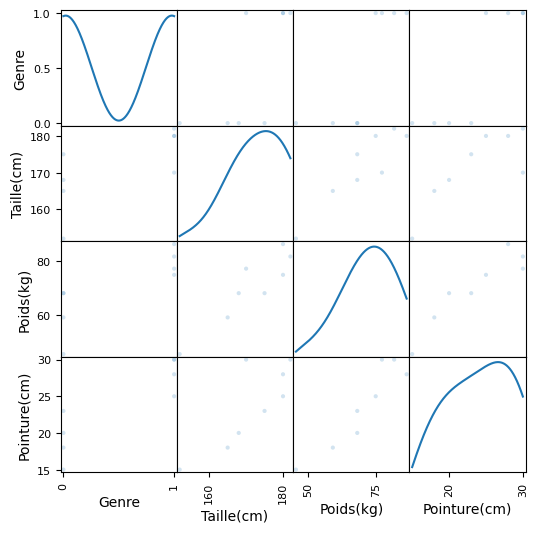

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(dfplot, alpha=0.2, figsize=(6, 6), diagonal='kde')

c:\Users\pures\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


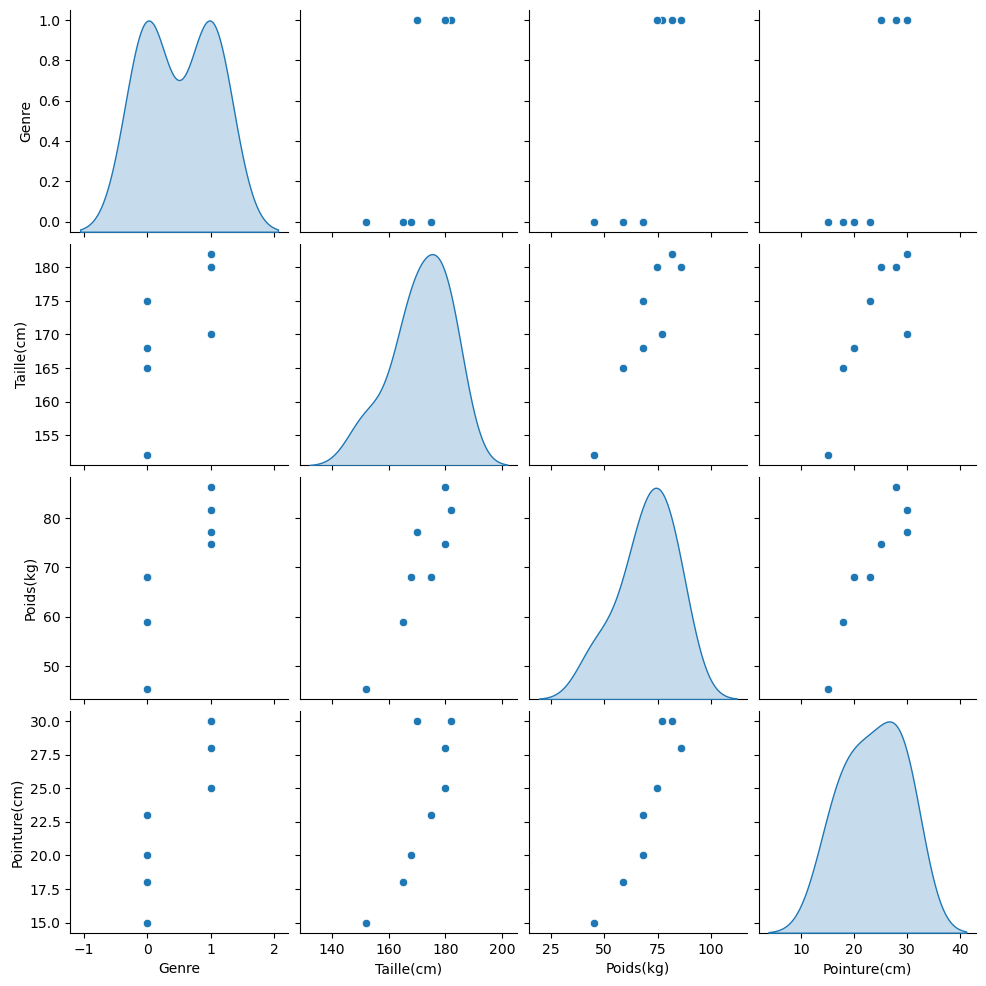

In [18]:
sns.pairplot(dfplot, diag_kind='kde', dropna=True)

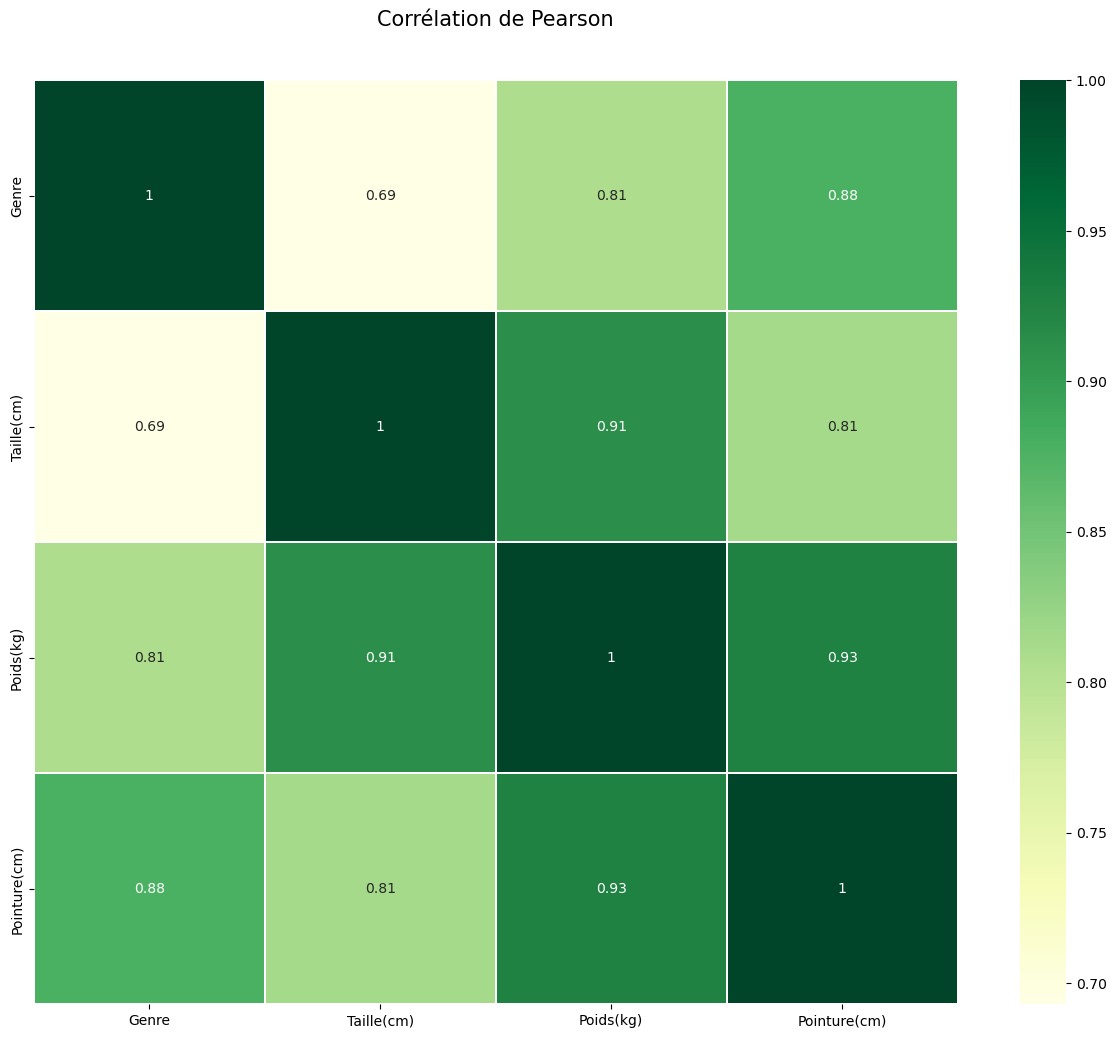

In [19]:
corr = dfplot.corr()
corr = corr.round(3)
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Corrélation de Pearson', y=1.05, size=15)
plt.show()

# DEFINIR LES FEATURES
# SEPARER LE DATASET EN TRAIN ET TEST

In [20]:
X = df.iloc[:, lambda df: [1, 2, 3]]
y = df.iloc[:, 0]

In [21]:
#print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# FAIRE APPRENDRE LE MODELE

# EVALUATION SUR LE TRAIN

# EVALUATION SUR LE TEST

# PREDICTION

In [25]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import mlflow

mlflow.set_experiment(experiment_name='experiment')
mlflow.set_tracking_uri("http://75.154.170.166:7777")

with mlflow.start_run():
  

  #decomposer les donnees predicteurs en training/testing
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
  mlflow.log_param("test_size", 0.2)
  mlflow.log_param("random_state", 44)

  gnb = GaussianNB()
  gnb.fit(X_train, y_train)

  mlflow.log_param("train_model", "completed")
  mlflow.sklearn.log_model(gnb, "model")

#predict train
  y_naive_bayes_train = gnb.predict(X_train)
  print("Number of mislabeled points out of a total 0%d points : 0%d" % (X_train.shape[0],(y_train != y_naive_bayes_train).sum()))

  accuracy_train = metrics.accuracy_score(y_train, y_naive_bayes_train)
  print("Accuracy du modele Naive Bayes predit: " + str(accuracy_train))
  mlflow.log_metric("accuracy_train", metrics.accuracy_score(y_train,  y_naive_bayes_train))


  recall_score_train = metrics.recall_score(y_train, y_naive_bayes_train)
  print("recall score du modele Naive Bayes predit: " + str(recall_score_train))
  mlflow.log_metric("recall_score_train", metrics.recall_score(y_train,  y_naive_bayes_train))

  f1_score_train = metrics.f1_score(y_train, y_naive_bayes_train)
  print("F1 score du modele Naive Bayes predit: " + str(f1_score_train))
  mlflow.log_metric("f1_score_train", metrics.f1_score(y_train,  y_naive_bayes_train))

#predict test
  y_naive_bayes_test = gnb.predict(X_test)
  print("Number of mislabeled points out of a total 0%d points : 0%d" % (X_test.shape[0],(y_test != y_naive_bayes_test).sum()))

  accuracy_test = metrics.accuracy_score(y_test, y_naive_bayes_test)
  print("Accuracy du modele Naive Bayes predit: " + str(accuracy_test))
  mlflow.log_metric("accuracy_test", metrics.accuracy_score(y_test,  y_naive_bayes_test))

  recall_score_test = metrics.recall_score(y_test, y_naive_bayes_test)
  print("recall score du modele Naive Bayes predit: " + str(recall_score_test))
  mlflow.log_metric("recall_score_test", metrics.recall_score(y_test,  y_naive_bayes_test))

  f1_score_test = metrics.f1_score(y_test, y_naive_bayes_test)
  print("F1 score du modele Naive Bayes predit: " + str(f1_score_test))
  mlflow.log_metric("f1_score_test", metrics.f1_score(y_test,  y_naive_bayes_test))

#individu a predire la classe 

  d = {'Taille(cm)':[183], 'Poids(kg)':[59], 'Pointure(cm)':[20]}
  dfToPredict = pd.DataFrame(data=d) 
  dfToPredict


  yPredict = gnb.predict(dfToPredict)
  mlflow.log_param("predictions", str(yPredict))
  print('La classe predite est : ', yPredict)

2023/12/05 15:17:48 INFO mlflow.tracking.fluent: Experiment with name 'experiment' does not exist. Creating a new experiment.


Number of mislabeled points out of a total 06 points : 00
Accuracy du modele Naive Bayes predit: 1.0
recall score du modele Naive Bayes predit: 1.0
F1 score du modele Naive Bayes predit: 1.0
Number of mislabeled points out of a total 02 points : 01
Accuracy du modele Naive Bayes predit: 0.5
recall score du modele Naive Bayes predit: 0.0
F1 score du modele Naive Bayes predit: 0.0
La classe predite est :  [0]
